In [1]:
from generator_cgan import ConditionalGenerator
import torch
import torch.nn.functional as F

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

latent_dim = 100
num_classes = 10



In [3]:
# crear modelo
G = ConditionalGenerator(latent_dim, num_classes).to(device)

# cargar pesos
G.load_state_dict(torch.load("generator_mnist.pth", map_location=device))
G.eval()

ConditionalGenerator(
  (fc): Sequential(
    (0): Linear(in_features=110, out_features=12544, bias=True)
    (1): BatchNorm1d(12544, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv_blocks): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): Tanh()
  )
)

In [4]:
z = torch.randn(1, latent_dim).to(device)
label = torch.tensor([5]).to(device)
y = F.one_hot(label, num_classes).float()

with torch.no_grad():
    img = G(z, y)
    img = (img + 1) / 2  # de [-1,1] a [0,1]

In [6]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, utils


In [29]:
def generate_digit(generator, digit: int, n_samples: int = 16, save_path=None):
    """
    Genera n_samples imágenes del dígito 'digit' (0-9) usando la cGAN entrenada.
    """
    generator.eval()
    with torch.no_grad():
        z = torch.randn(n_samples, latent_dim, device=device)
        labels = torch.full((n_samples,), digit, dtype=torch.long, device=device)
        y = F.one_hot(labels, num_classes).float().to(device)
        imgs = generator(z, y)        # en [-1,1]
        imgs = (imgs + 1) / 2.0       # a [0,1]

    if save_path is not None:
        utils.save_image(imgs, save_path, nrow=4)
        print(f"Imágenes del dígito {digit} guardadas en {save_path}")

    # Mostrar la primera como ejemplo
    img0 = imgs[0].cpu().squeeze()
    plt.imshow(img0, cmap="gray")
    plt.title(f"Dígito generado: {digit}")
    plt.axis("off")
    plt.show()

    return imgs

Generando ejemplos del dígito 9...


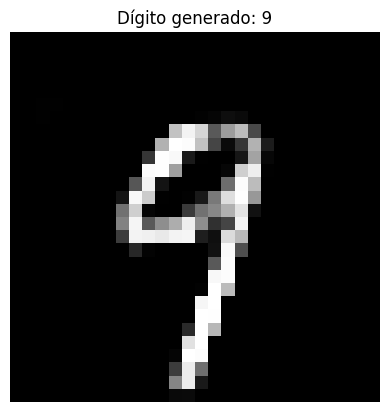

tensor([[[[9.5129e-05, 1.4752e-05, 5.0962e-06,  ..., 2.0862e-06,
           6.5565e-07, 2.5928e-06],
          [4.7684e-06, 5.0664e-07, 2.9802e-07,  ..., 4.4703e-07,
           5.9605e-08, 4.4703e-07],
          [2.4438e-06, 1.7881e-07, 2.6822e-07,  ..., 1.3411e-06,
           8.9407e-08, 3.5763e-07],
          ...,
          [1.8805e-05, 2.0862e-07, 5.3644e-07,  ..., 4.3273e-05,
           8.6993e-05, 1.6883e-04],
          [5.4538e-06, 0.0000e+00, 2.9802e-08,  ..., 6.9439e-06,
           1.3471e-05, 7.3642e-05],
          [9.8348e-06, 2.3842e-07, 2.0862e-07,  ..., 6.7323e-05,
           5.3793e-05, 2.4480e-04]]],


        [[[1.2085e-04, 1.8060e-05, 5.3316e-05,  ..., 7.1526e-07,
           1.1921e-07, 3.4571e-06],
          [3.7611e-05, 8.7321e-06, 4.1395e-05,  ..., 0.0000e+00,
           0.0000e+00, 2.9802e-07],
          [3.1024e-05, 2.9802e-06, 5.2959e-05,  ..., 3.5763e-07,
           0.0000e+00, 3.2783e-07],
          ...,
          [3.1829e-05, 2.3842e-07, 5.9605e-08,  ..., 1.40

In [43]:
number = 9


# ===========================
# 10. Ejemplo: generar varios "9" al terminar
# ===========================
print(f"Generando ejemplos del dígito {number}...")
generate_digit(G, digit=number, n_samples=16)